In [ ]:
pip install PyWavelets

In [15]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
from matplotlib.image import imread
plt.rcParams["figure.figsize"] = [16, 16]
plt.rcParams.update({"font.size" : 18})

In [16]:
dog_image = "/content/dog2.jpg"

Image = imread(dog_image )
Image = np.mean(Image , axis = -1) #RGB to gray


In [17]:
# wavelet decomposition at 2 level

n = 2
w = "db1"

coeffs = pywt.wavedec2(Image , wavelet=w , level = n  )



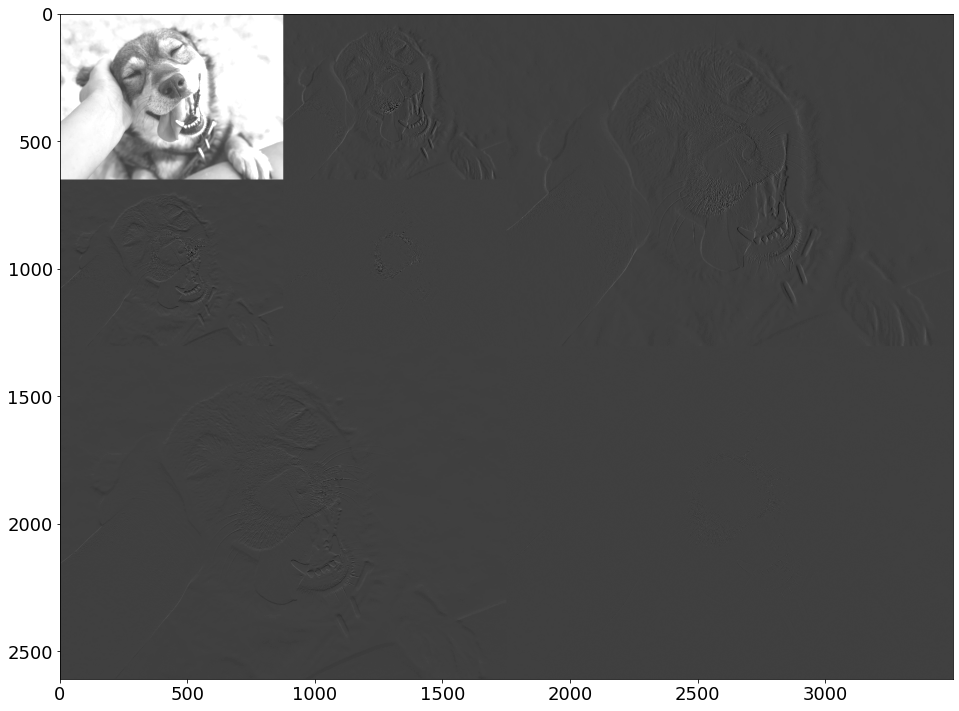

In [18]:
# normalize each coefficient array
coeffs[0] /= np.abs(coeffs[0]).max()
for detail_level in range(n):
    coeffs[detail_level + 1] = [d/np.abs(d).max() for d in coeffs[detail_level + 1]]

arr, coeff_slices = pywt.coeffs_to_array(coeffs)



plt.imshow(arr,cmap='gray',vmin=-0.25,vmax=0.75)
plt.show()

threshold 4.0
threshold 8.500000000000009
threshold 41.52083333333326
threshold 100.41666666666674


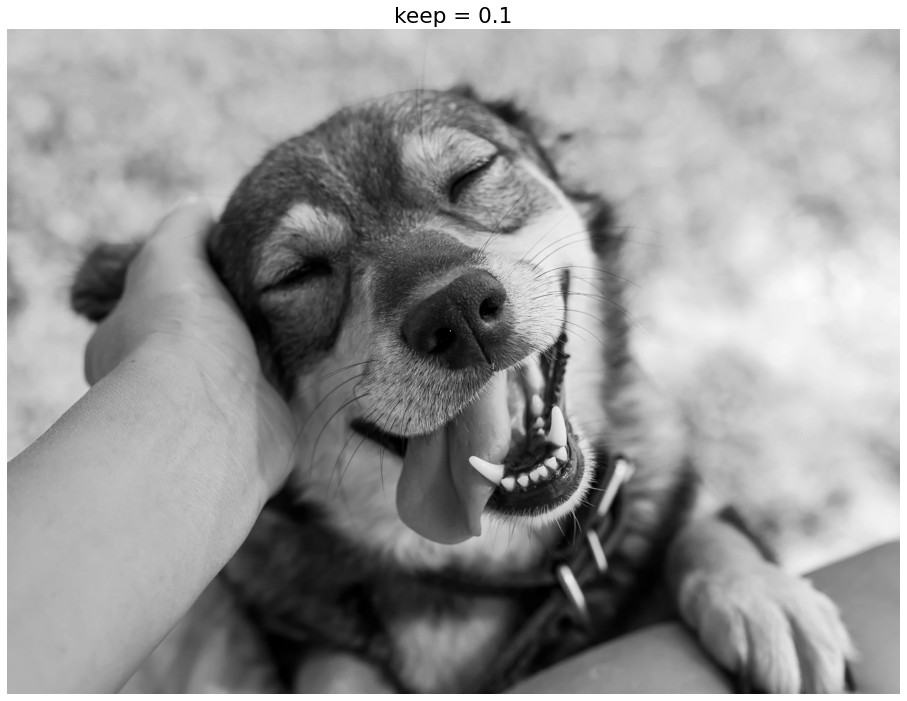

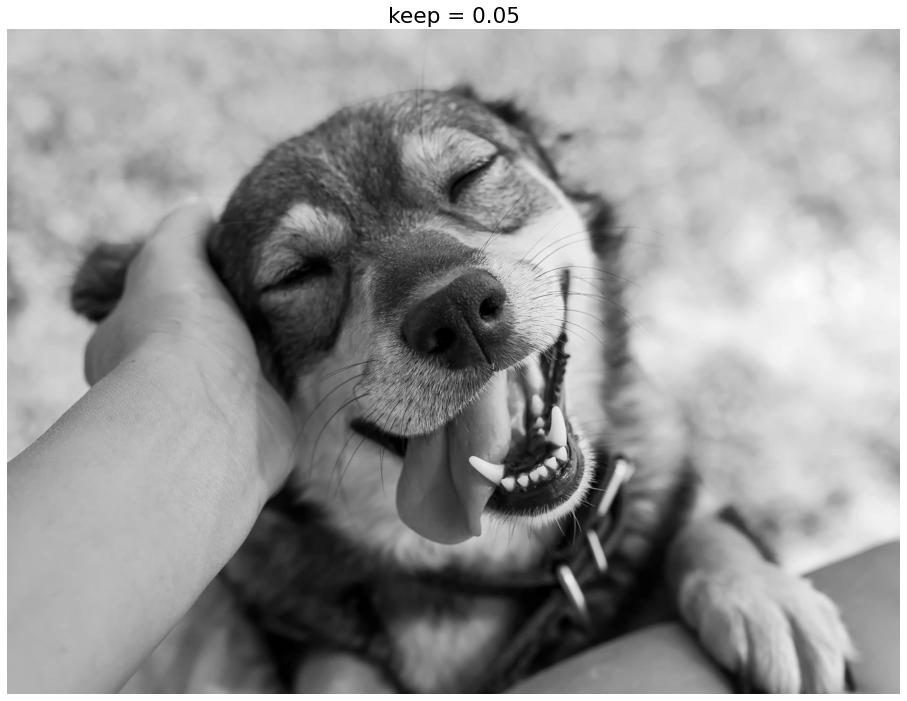

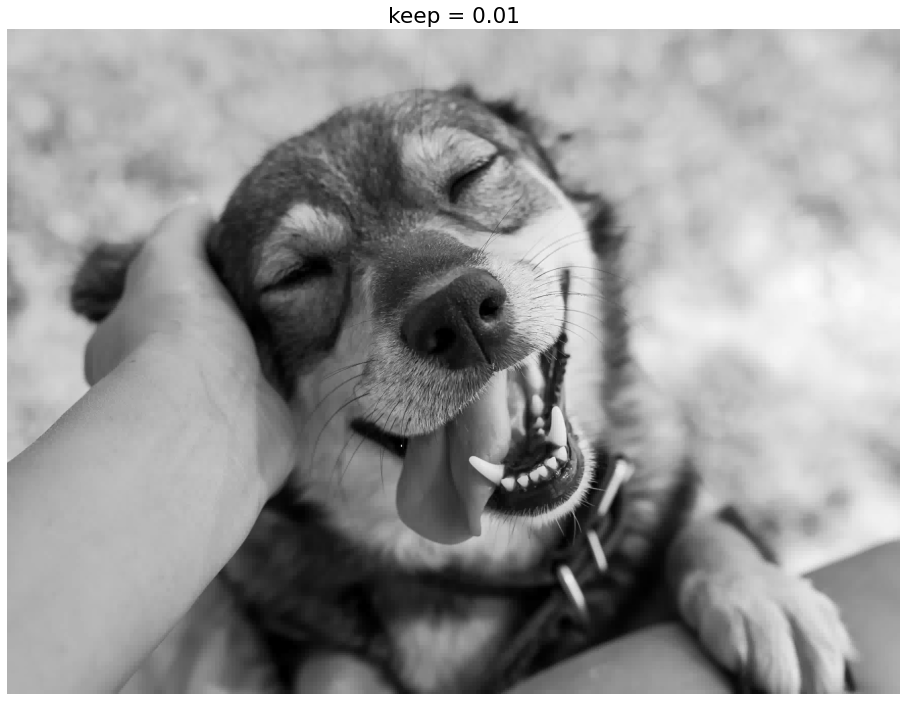

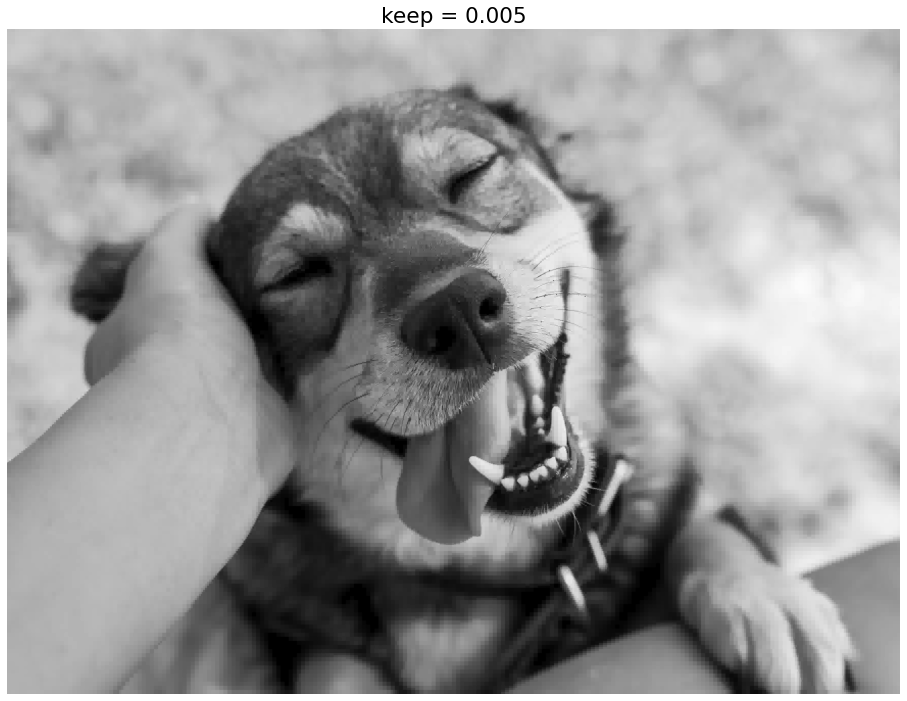

In [19]:
#wavelet compression

n = 4
w = "db1"

coeffs = pywt.wavedec2(Image , wavelet= w , level = n)

coeff_arr , coeff_slices = pywt.coeffs_to_array(coeffs)

Csort = np.sort(np.abs(coeff_arr.reshape(-1)))

for keep in (0.1 , 0.05, 0.01 , 0.005):
  thresh = Csort[int(np.floor((1 - keep) * len(Csort)))]
  print("threshold" , thresh)
  ind = np.abs(coeff_arr) > thresh
  Cfilt = coeff_arr * ind

  coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')
    
  # Plot reconstruction
  Arecon = pywt.waverec2(coeffs_filt,wavelet=w)
  plt.figure()
  plt.imshow(Arecon.astype('uint8'),cmap='gray')
  plt.axis('off')
  plt.title('keep = ' + str(keep))


In [20]:
len(Csort)

9130608

In [21]:
Csort[int(0.9 * len(Csort))]

4.0

In [22]:
# 3 channel wavelet decomposition

Image = imread("/content/dog2.jpg")
n = 2
w = "db1"

coeffs_1 = pywt.wavedec2(Image[:,:,0] , w , level = n)
coeffs_2 = pywt.wavedec2(Image[:,:,1] , w , level = n)
coeffs_3 = pywt.wavedec2(Image[:,:,2] , w , level = n)


Thresh1 7.000000000000007
Thresh2 7.0
Thresh3 7.0


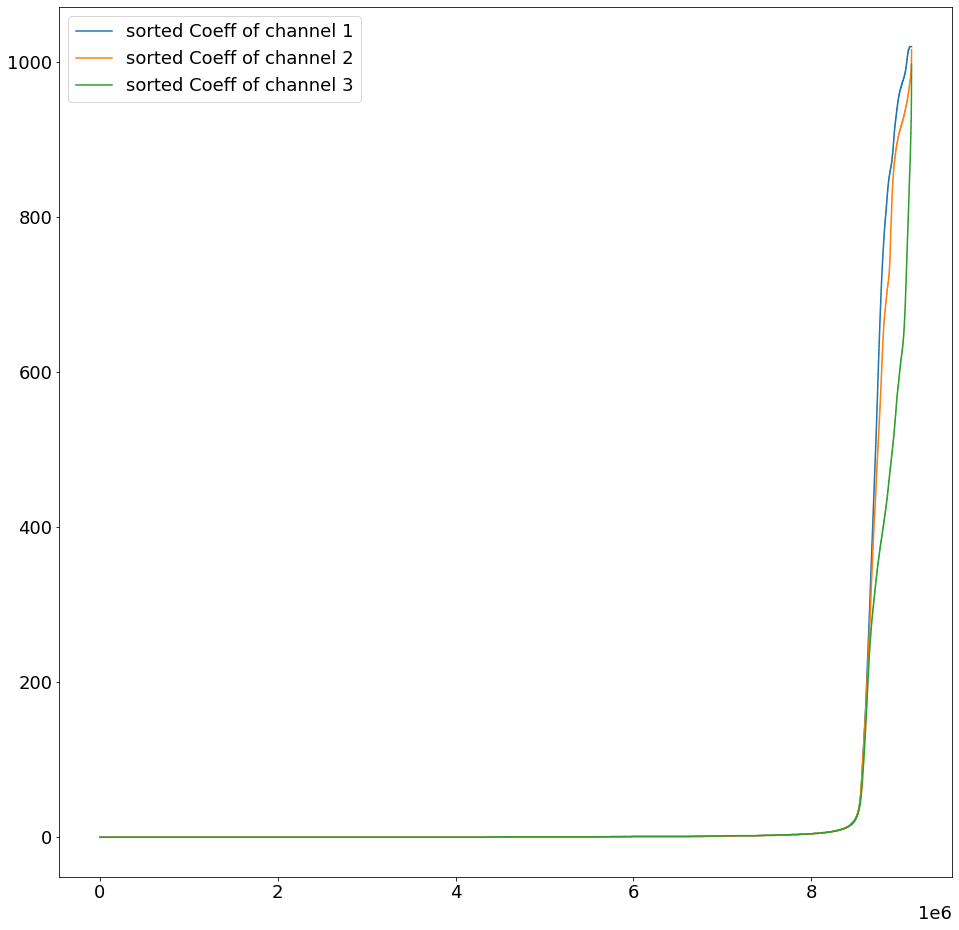

In [23]:
keep = 0.1

coeff_arr1 , coeff_slices1 = pywt.coeffs_to_array(coeffs_1)
coeff_arr2 , coeff_slices2 = pywt.coeffs_to_array(coeffs_2)
coeff_arr3 , coeff_slices3 = pywt.coeffs_to_array(coeffs_3)

Csort1 = np.sort(np.abs(coeff_arr1.reshape(-1)))
Csort2 = np.sort(np.abs(coeff_arr2.reshape(-1)))
Csort3 = np.sort(np.abs(coeff_arr3.reshape(-1)))

plt.plot(Csort1 , label = "sorted Coeff of channel 1")
plt.plot(Csort2 , label = "sorted Coeff of channel 2")
plt.plot(Csort3 , label = "sorted Coeff of channel 3")
plt.legend()


thresh1 = Csort1[int(np.floor((1 - keep) * len(Csort1)))]
thresh2 = Csort2[int(np.floor((1 - keep) * len(Csort2)))]
thresh3 = Csort3[int(np.floor((1 - keep) * len(Csort3)))]
print("Thresh1" , thresh1)
print("Thresh2" , thresh2)
print("Thresh3" , thresh3)

idx1 = np.abs(coeff_arr1) > thresh1
idx2 = np.abs(coeff_arr2) > thresh2
idx3 = np.abs(coeff_arr3) > thresh3

Cfilter1 = coeff_arr1 * idx1
Cfilter2 = coeff_arr2 * idx2
Cfilter3 = coeff_arr3 * idx3

coeff_filtered1 = pywt.array_to_coeffs(Cfilter1 , coeff_slices1, output_format="wavedec2")
coeff_filtered2 = pywt.array_to_coeffs(Cfilter2 , coeff_slices2, output_format="wavedec2")
coeff_filtered3 = pywt.array_to_coeffs(Cfilter3 , coeff_slices3, output_format="wavedec2")


In [24]:
Recon1 = pywt.waverec2(coeff_filtered1 , wavelet=w)
Recon2 = pywt.waverec2(coeff_filtered2 , wavelet=w)
Recon3 = pywt.waverec2(coeff_filtered3 , wavelet=w)


In [25]:
Recon2.shape

(2608, 3500)

In [26]:
recon = np.zeros((Recon2.shape[0],Recon2.shape[1],3) , dtype = int)
recon.shape

(2608, 3500, 3)

In [27]:
recon[:,:,0] = recon[:,:,0] + Recon1
recon[:,:,1] = recon[:,:,1] + Recon2
recon[:,:,2] = recon[:,:,2] + Recon3

(-0.5, 3499.5, 2607.5, -0.5)

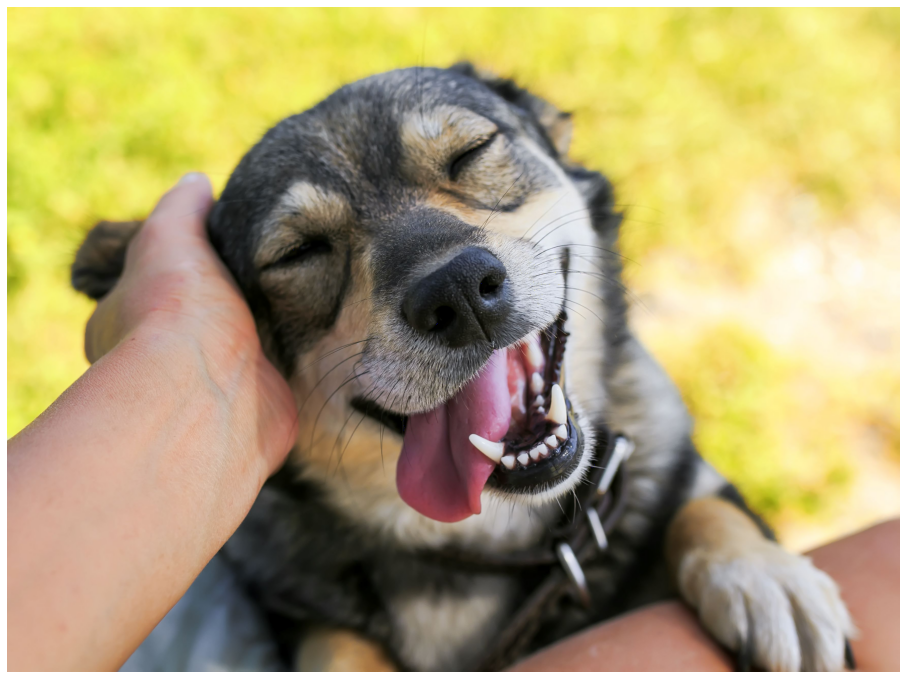

In [28]:
plt.imshow(recon.astype("uint8")  )
plt.axis("off")

In [33]:
compressedfile = open("filtered.txt" , "w")
compressedfile.write(str(Cfilter1))
compressedfile.write("/n" + str(Cfilter2))
compressedfile.write(str(Cfilter3))
compressedfile.write(str(coeff_slices1))
compressedfile.write(str(coeff_slices2))
compressedfile.write(str(coeff_slices3))

compressedfile.close()


